In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import preprocessing
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import Lasso
from multiprocessing import Process, Queue
import psutil
import time

In [167]:
data = pd.read_csv("Obfuscated-MalMem2022.csv")
data.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


In [168]:
for col in data.columns:
    print(col)

Category
pslist.nproc
pslist.nppid
pslist.avg_threads
pslist.nprocs64bit
pslist.avg_handlers
dlllist.ndlls
dlllist.avg_dlls_per_proc
handles.nhandles
handles.avg_handles_per_proc
handles.nport
handles.nfile
handles.nevent
handles.ndesktop
handles.nkey
handles.nthread
handles.ndirectory
handles.nsemaphore
handles.ntimer
handles.nsection
handles.nmutant
ldrmodules.not_in_load
ldrmodules.not_in_init
ldrmodules.not_in_mem
ldrmodules.not_in_load_avg
ldrmodules.not_in_init_avg
ldrmodules.not_in_mem_avg
malfind.ninjections
malfind.commitCharge
malfind.protection
malfind.uniqueInjections
psxview.not_in_pslist
psxview.not_in_eprocess_pool
psxview.not_in_ethread_pool
psxview.not_in_pspcid_list
psxview.not_in_csrss_handles
psxview.not_in_session
psxview.not_in_deskthrd
psxview.not_in_pslist_false_avg
psxview.not_in_eprocess_pool_false_avg
psxview.not_in_ethread_pool_false_avg
psxview.not_in_pspcid_list_false_avg
psxview.not_in_csrss_handles_false_avg
psxview.not_in_session_false_avg
psxview.not_i

In [169]:
X = data.drop(["Class", "Category"], axis=1)
#X = data.drop("Category", axis=1)
y = data["Class"]

y = y.replace(["Benign"], 1)
y = y.replace(["Malware"], 0)

print(X.shape)
X.head()

(58596, 55)


,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
0,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,0,...,389,221,26,24,116,0,121,87,0,8
1,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,0,...,392,222,26,24,118,0,122,87,0,8
2,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,0,...,395,222,26,27,118,0,120,88,0,8
3,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,0,...,395,222,26,27,118,0,120,88,0,8
4,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,0,...,392,222,26,24,118,0,124,87,0,8


In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape

((46876, 55), (11720, 55))

<AxesSubplot:>

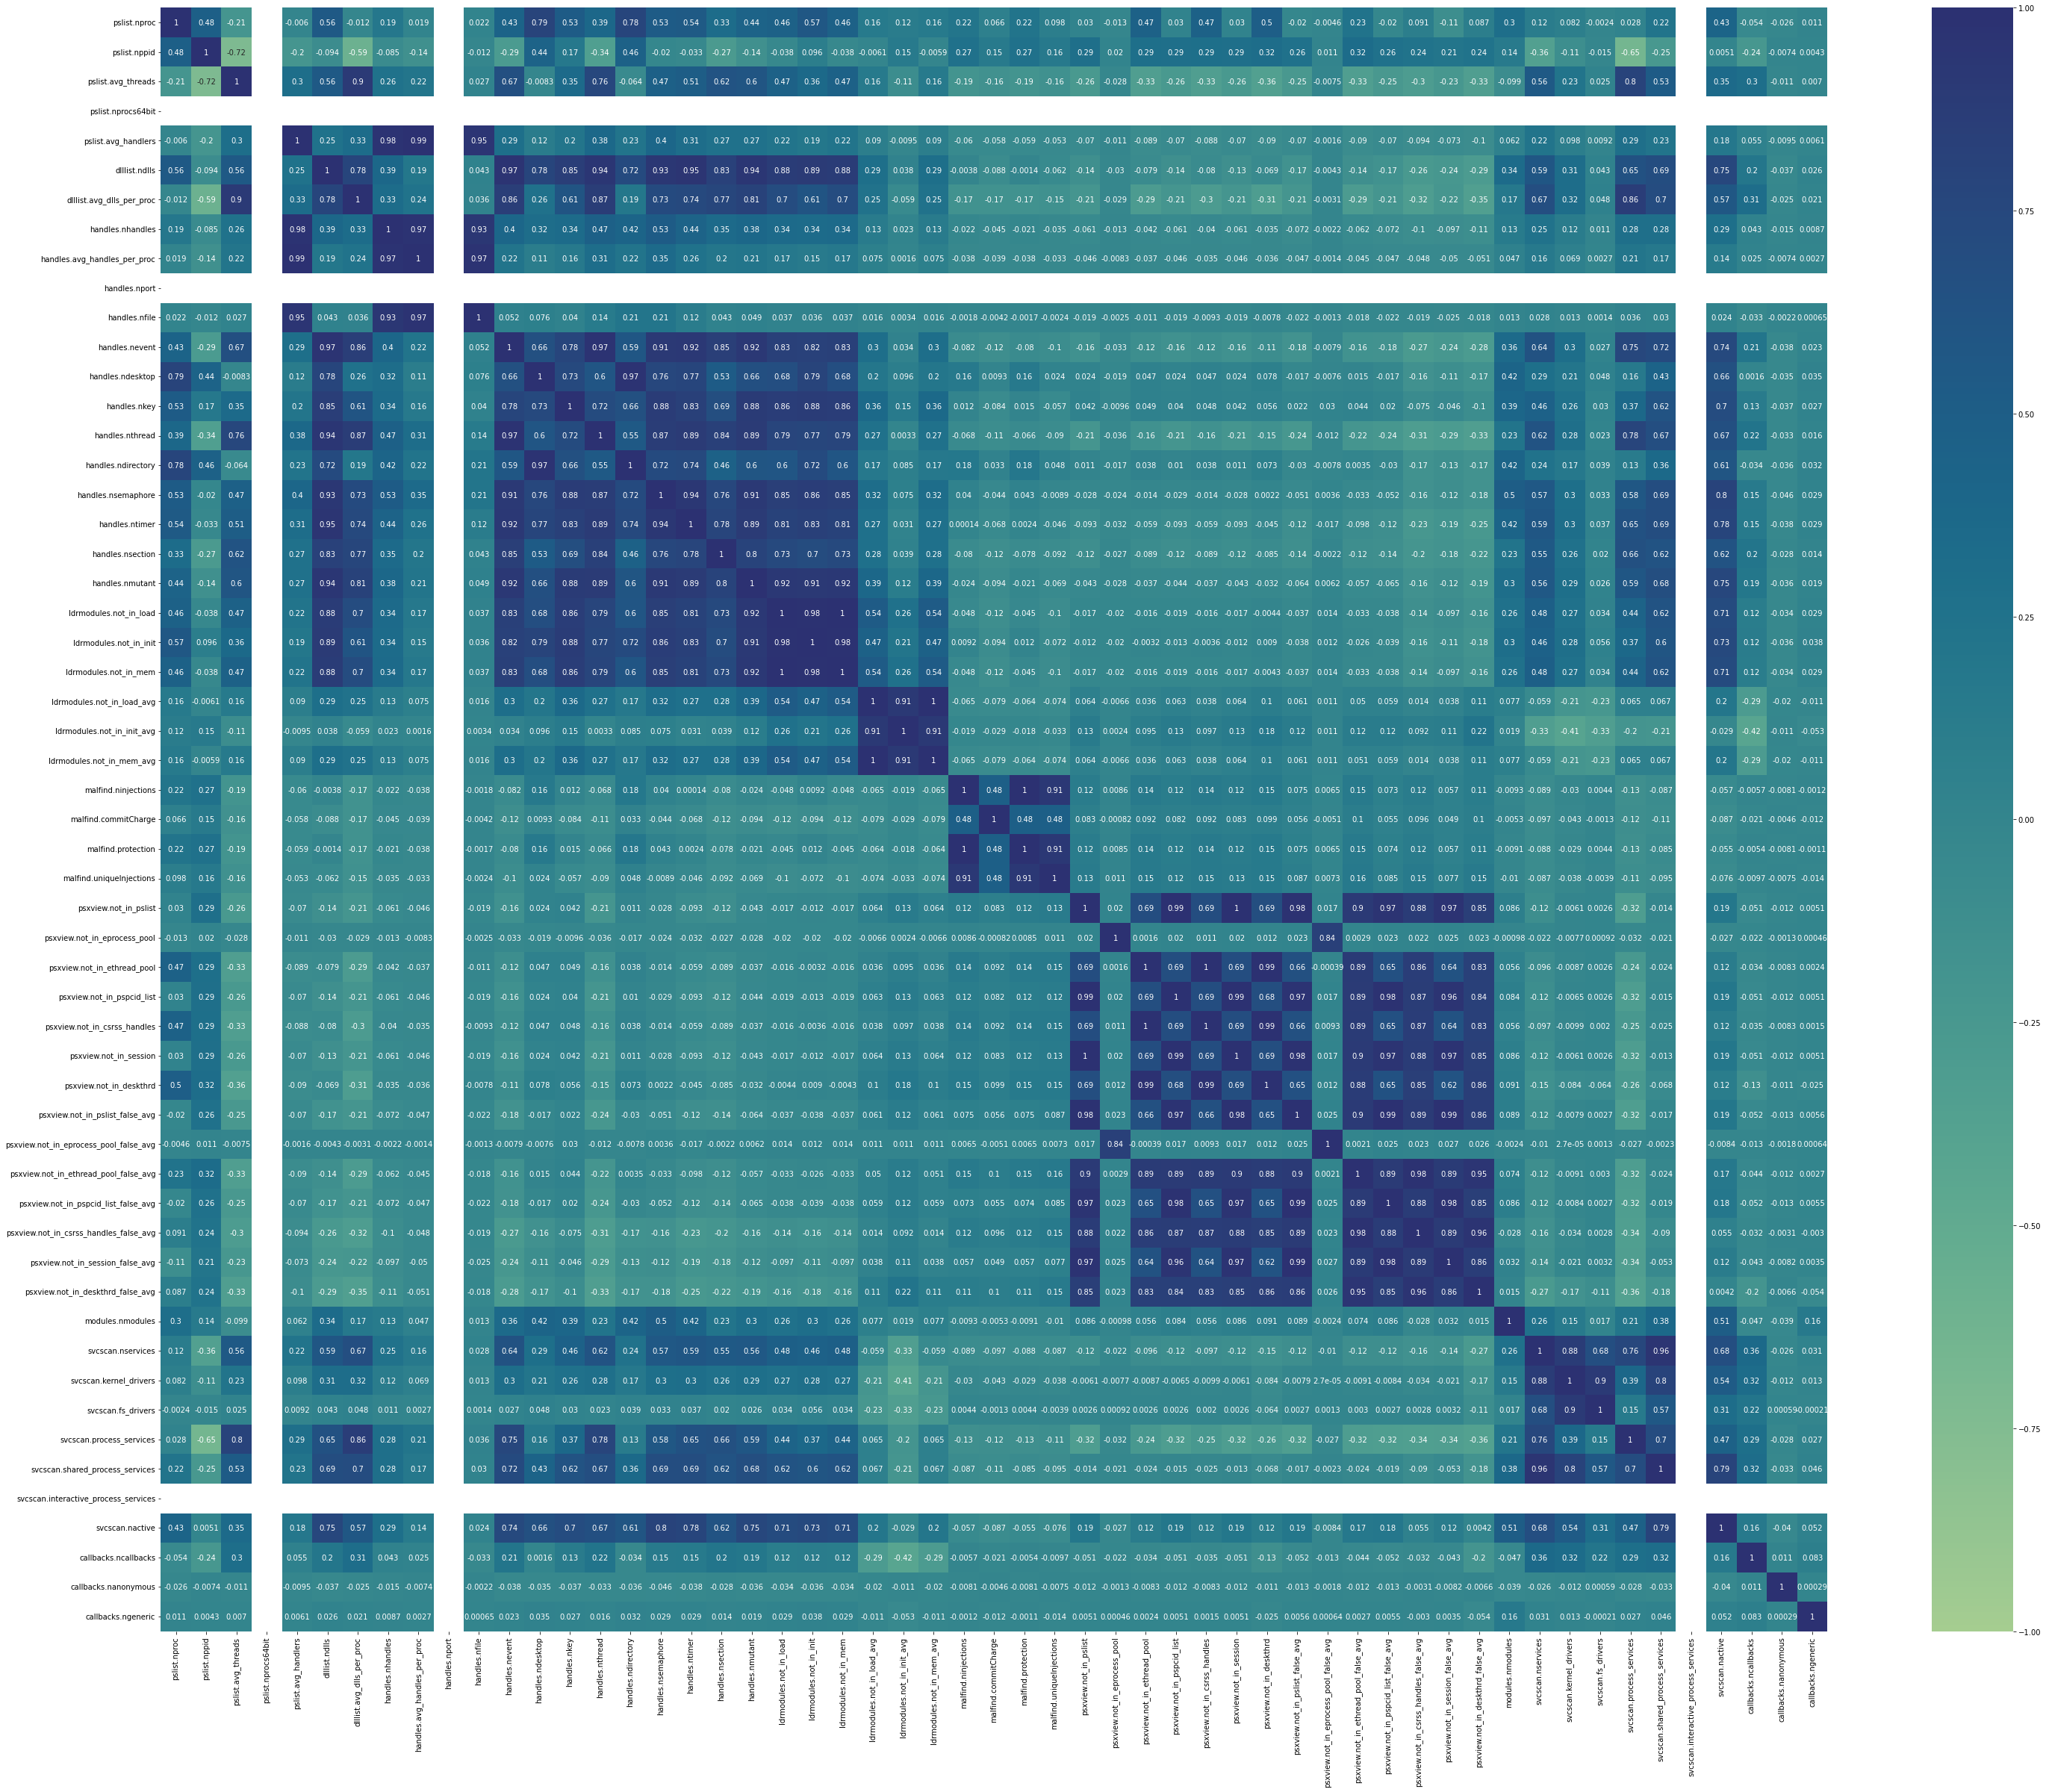

In [171]:
plt.figure(figsize=(50,40))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap="crest", vmin=-1, vmax=1)

In [172]:
#Lasso regression model
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))



Lasso Model............................................

The train score for ls model is 0.7733390219117865
The test score for ls model is 0.7727050725319464


In [173]:
X, y = make_classification(n_features=55, random_state=0)
clf = make_pipeline(StandardScaler(),
                    LinearSVC(dual="auto", random_state=0, tol=1e-5))
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(dual='auto', random_state=0, tol=1e-05))])

In [174]:
print(clf.named_steps['linearsvc'].coef_)


[[-0.13328001  0.83550116  0.31227524 -0.26472195  0.07125664 -0.10026608
   0.05797819 -0.39816505 -0.32165784 -0.11943089 -0.24763062  0.18598433
  -0.06527815 -0.18005195  0.17252212  0.28452482  0.09560628  0.34779843
  -0.06307306 -0.22809434 -0.06333291 -0.33072669  0.1524398  -0.19039113
  -0.16707734  1.0872456  -0.26524501 -0.10169507 -0.43071175 -0.17957492
   0.42689543  0.17146572  0.27696413 -0.09776498 -0.34600928  0.11158761
   0.24181569 -0.0854116   0.8125421   0.00601039 -0.17293003 -0.15616881
   0.12860843  0.12523726 -0.27940934  0.52202635 -0.08341541  0.1424516
  -0.02830003 -0.18961916 -0.02963287 -0.01992171  0.19039392 -0.09102767
   0.1498405 ]]


In [175]:
print(clf.named_steps['linearsvc'].intercept_)


[0.1885421]
